In [16]:
"""
Notebook Práctico: Proceso ETL con Datos de Ecobici de Buenos Aires
"""

# =============================================================================
# LIBRERÍAS
# =============================================================================
# Importamos las librerías que usaremos a lo largo del proceso.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

print("Librerías importadas.")

Librerías importadas.


In [17]:
# =============================================================================
# FASE 1: EXTRACCIÓN (Extract)
# =============================================================================
print("\n--- FASE 1: EXTRACCIÓN ---")

# Vamos a extraer los datos de viajes de Ecobici de 2024.
# Fuente: Datos abiertos de la ciudad de Buenos Aires
url = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/recorridos-realizados-2024.zip"

zip_file_name = "recorridos-realizados-2024.zip"
csv_file_name = "badata_ecobici_recorridos_realizados_2024.csv"

print(f"Descargando datos desde: {url}")
try:
    response = requests.get(url, timeout=1200) # Added a timeout of 600 seconds (10 minutes)
    response.raise_for_status() # Raise an exception for bad status codes
    print("Descarga completada con éxito.")
except requests.exceptions.Timeout as e:
    print(f"Error de timeout durante la descarga: {e}")
    df_raw = pd.DataFrame()
except requests.exceptions.RequestException as e:
    print(f"Error durante la descarga: {e}")
    df_raw = pd.DataFrame()


--- FASE 1: EXTRACCIÓN ---
Descargando datos desde: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/recorridos-realizados-2024.zip


KeyboardInterrupt: 

In [18]:
# Save the zip file locally
#with open(zip_file_name, 'wb') as f:
#    f.write(response.content)
#print(f"Archivo zip guardado como {zip_file_name}")

# Extract the specific CSV file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    if csv_file_name in zip_ref.namelist():
        zip_ref.extract(csv_file_name)
        print(f"Archivo {csv_file_name} extraído.")
    else:
        print(f"Error: El archivo {csv_file_name} no se encontró dentro del zip.")
        df_raw = pd.DataFrame()
        raise FileNotFoundError(f"{csv_file_name} not found in zip")

# Read the extracted CSV into a DataFrame
print(f"Leyendo datos desde: {csv_file_name}")
df_raw = pd.read_csv(csv_file_name)
print("Extracción completada con éxito.")
print(f"Se cargaron {df_raw.shape[0]} registros.")

Archivo badata_ecobici_recorridos_realizados_2024.csv extraído.
Leyendo datos desde: badata_ecobici_recorridos_realizados_2024.csv
Extracción completada con éxito.
Se cargaron 3559284 registros.


In [22]:
# Mostrar el tamaño del DataFrame (filas y columnas)
print("Tamaño del DataFrame:")
print(df_raw.shape)

# Mostrar una previsualización de los datos
print("\nPrevisualización del DataFrame:")
display(df_raw.head(50))

Tamaño del DataFrame:
(3559284, 17)

Previsualización del DataFrame:


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE
5,20427241,466,2024-01-23 17:48:05,99,099 - Malabia,780 Malabia & Loyola,-58.435408,-34.596096,2024-01-23 17:55:51,206,159 - Fitz Roy & Gorriti,Fitz Roy & Gorriti,-58.437339,-34.584950,320714.0,FIT,OTHER
6,20431004,1176,2024-01-23 21:17:38,68,105 - PARQUE SAAVEDRA,García del Río 3590,-58.480464,-34.552148,2024-01-23 21:37:14,68,105 - PARQUE SAAVEDRA,García del Río 3590,-58.480464,-34.552148,1041602.0,ICONIC,MALE
7,20431427,1906,2024-01-23 22:03:46,17,017 - Plaza Almagro,"441 Bulnes & Peron, Juan Domingo, Tte. General",-58.418731,-34.606410,2024-01-23 22:35:32,186,186 - MANZANA 66,2875 Moreno,-58.406441,-34.613636,992479.0,FIT,FEMALE
8,20429542,695,2024-01-23 19:44:05,284,229 - RIGLOS,1019 Riglos,-58.435056,-34.631018,2024-01-23 19:55:40,432,187 - Jose Maria Moreno,141 Jose Maria Moreno,-58.435801,-34.619879,320688.0,FIT,FEMALE
9,20431142,492,2024-01-23 21:31:25,432,187 - Jose Maria Moreno,141 Jose Maria Moreno,-58.435801,-34.619879,2024-01-23 21:39:37,284,229 - RIGLOS,1019 Riglos,-58.435056,-34.631018,320688.0,FIT,FEMALE


In [24]:
# =============================================================================
# FASE 2: TRANSFORMACIÓN (Transform)
# =============================================================================
print("\n--- FASE 2: TRANSFORMACIÓN ---")

# Hacemos una copia para no modificar el DataFrame original
df = df_raw.copy()

# --- 2.1 Limpieza de Datos (Cleaning) ---
print("\nIniciando limpieza de datos...")

# Mostrar tipos de datos antes de la transformación
print("\nTipos de datos antes de la conversión a datetime:")
print(df[['fecha_origen_recorrido', 'fecha_destino_recorrido']].dtypes)

# Convertir columnas de fecha a formato datetime
df['fecha_destino_recorrido'] = pd.to_datetime(df['fecha_destino_recorrido'])
print("\nColumnas de fecha convertidas a datetime.")

# Mostrar tipos de datos despues de la transformación
print("\nTipos de datos despues de la conversión a datetime:")
print(df[['fecha_origen_recorrido', 'fecha_destino_recorrido']].dtypes)

# Mostrar una previsualización del DataFrame después de la transformación
print("\nPrevisualización del DataFrame después de la conversión:")
display(df.head())


--- FASE 2: TRANSFORMACIÓN ---

Iniciando limpieza de datos...

Tipos de datos antes de la conversión a datetime:
fecha_origen_recorrido     object
fecha_destino_recorrido    object
dtype: object

Columnas de fecha convertidas a datetime.

Tipos de datos despues de la conversión a datetime:
fecha_origen_recorrido             object
fecha_destino_recorrido    datetime64[ns]
dtype: object

Previsualización del DataFrame después de la conversión:


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE


In [25]:
# Manejo de Valores Nulos (Imputación)
# Verificamos si hay nulos en columnas clave
print(f"Valores nulos en 'nombre_estacion_origen': {df['nombre_estacion_origen'].isnull().sum()}")
print(f"Valores nulos en 'nombre_estacion_destino': {df['nombre_estacion_destino'].isnull().sum()}")
print(f"Valores nulos en 'duracion_recorrido': {df['duracion_recorrido'].isnull().sum()}")
print(f"Valores nulos en 'modelo_bicicleta': {df['modelo_bicicleta'].isnull().sum()}")

Valores nulos en 'nombre_estacion_origen': 0
Valores nulos en 'nombre_estacion_destino': 0
Valores nulos en 'duracion_recorrido': 0
Valores nulos en 'modelo_bicicleta': 0


In [26]:
# Verificar valores nulos en todas las columnas
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
id_recorrido                      0
duracion_recorrido                0
fecha_origen_recorrido            0
id_estacion_origen                0
nombre_estacion_origen            0
direccion_estacion_origen         0
long_estacion_origen              0
lat_estacion_origen               0
fecha_destino_recorrido        3379
id_estacion_destino               0
nombre_estacion_destino           0
direccion_estacion_destino        0
long_estacion_destino             0
lat_estacion_destino              0
id_usuario                        0
modelo_bicicleta                  0
genero                        11946
dtype: int64



Visualización de la distribución de 'genero':

Conteo de viajes por género:
genero
MALE      2147721
FEMALE    1133660
OTHER      265957
Name: count, dtype: int64


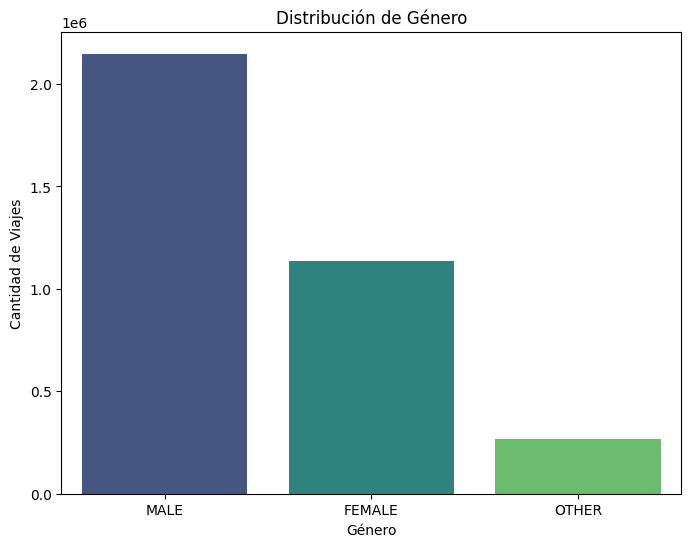

In [27]:
# Visualizar la distribución de la variable categórica 'genero'
print("\nVisualización de la distribución de 'genero':")

# Imprimir la cantidad de cada variable categórica en 'genero'
print("\nConteo de viajes por género:")
print(df['genero'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='genero', palette='viridis', hue='genero', legend=False)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Viajes')
plt.show()

In [28]:
# Imputar valores nulos en la columna 'genero' con la constante "OTHER"
df['genero'] = df['genero'].fillna("OTHER")
print("Valores nulos en la columna 'genero' imputados con 'OTHER'.")

# Verificar si aún quedan valores nulos en la columna 'genero'
print(f"Valores nulos restantes en 'genero': {df['genero'].isnull().sum()}")

Valores nulos en la columna 'genero' imputados con 'OTHER'.
Valores nulos restantes en 'genero': 0


In [29]:
# Imprimir la cantidad de cada variable categórica en 'genero'
print("\nConteo de viajes por género:")
print(df['genero'].value_counts())


Conteo de viajes por género:
genero
MALE      2147721
FEMALE    1133660
OTHER      277903
Name: count, dtype: int64


In [30]:
#En el caso de la variable fecha_destino_recorrido, la estrategia más simple
#es eliminar las filas con datos faltantes ya que es una porcion pequeña del dataset
df.dropna(subset=['fecha_destino_recorrido'], inplace=True)
print("Registros con estaciones nulas eliminados.")
# Verificar valores nulos en todas las columnas
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

Registros con estaciones nulas eliminados.

Conteo de valores nulos por columna:
id_recorrido                  0
duracion_recorrido            0
fecha_origen_recorrido        0
id_estacion_origen            0
nombre_estacion_origen        0
direccion_estacion_origen     0
long_estacion_origen          0
lat_estacion_origen           0
fecha_destino_recorrido       0
id_estacion_destino           0
nombre_estacion_destino       0
direccion_estacion_destino    0
long_estacion_destino         0
lat_estacion_destino          0
id_usuario                    0
modelo_bicicleta              0
genero                        0
dtype: int64


In [31]:
# Aplicar One-Hot Encoding a las columnas 'genero' y 'modelo_bicicleta'
df_encoded = pd.get_dummies(df, columns=['genero', 'modelo_bicicleta'], prefix=['genero', 'modelo'])

# Mostrar las primeras filas del DataFrame codificado
print("\nDataFrame después de One-Hot Encoding:")
display(df_encoded.head())


DataFrame después de One-Hot Encoding:


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,genero_FEMALE,genero_MALE,genero_OTHER,modelo_FIT,modelo_ICONIC
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,False,True,False,True,False
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,True,False,False,True,False
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,True,False,False,True,False
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,True,False,False,False,True
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,True,False,False,True,False


In [32]:
# --- Discretización ---
print("\nIniciando discretización de 'duracion_recorrido'...")

# Definir los rangos y las etiquetas
bins = [0, 1200, 2400, 3600, df['duracion_recorrido'].max()]
labels = ['Viaje Corto', 'Viaje Mediano', 'Viaje Largo', 'Viaje Muy Largo (Anomalía)']

# Aplicar la discretización
df_encoded['categoria_duracion'] = pd.cut(df_encoded['duracion_recorrido'], bins=bins, labels=labels, right=False, include_lowest=True)

print("Columna 'categoria_duracion' creada.")

# Mostrar el conteo de valores en la nueva columna
print("\nConteo de viajes por categoría de duración:")
print(df_encoded['categoria_duracion'].value_counts())

# Mostrar las primeras filas con la nueva columna
print("\nPrevisualización del DataFrame con la nueva columna:")
display(df_encoded.head())


Iniciando discretización de 'duracion_recorrido'...
Columna 'categoria_duracion' creada.

Conteo de viajes por categoría de duración:
categoria_duracion
Viaje Corto                   2319458
Viaje Mediano                  922857
Viaje Largo                    196694
Viaje Muy Largo (Anomalía)     116895
Name: count, dtype: int64

Previsualización del DataFrame con la nueva columna:


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,genero_FEMALE,genero_MALE,genero_OTHER,modelo_FIT,modelo_ICONIC,categoria_duracion
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,...,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,False,True,False,True,False,Viaje Corto
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,...,Biarritz 2403,-58.477255,-34.605431,320782.0,True,False,False,True,False,Viaje Mediano
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,...,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,True,False,False,True,False,Viaje Corto
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,...,Segurola 3194,-58.511930,-34.607500,320782.0,True,False,False,False,True,Viaje Corto
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,...,Av. España 2200,-58.355465,-34.618755,861425.0,True,False,False,True,False,Viaje Corto


In [33]:
# Aplicar Normalización (Min-Max Scaling) a las columnas numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = [
    "duracion_recorrido",
    "long_estacion_origen",
    "lat_estacion_origen",
    "long_estacion_destino",
    "lat_estacion_destino"
]

df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

print("\nColumnas numéricas normalizadas:")
display(df_encoded.head())


Columnas numéricas normalizadas:


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,genero_FEMALE,genero_MALE,genero_OTHER,modelo_FIT,modelo_ICONIC,categoria_duracion
0,20428222,0.000221,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,0.211842,0.599945,2024-01-23 18:45:28,498,...,Gral. José Gervasio Artigas 4298 (y Habana),0.187258,0.669659,992557.0,False,True,False,True,False,Viaje Corto
1,20431744,0.000527,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,0.088375,0.531302,2024-01-23 23:03:55,382,...,Biarritz 2403,0.290404,0.544998,320782.0,True,False,False,True,False,Viaje Mediano
2,20429936,0.000000,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,0.764456,0.544451,2024-01-23 20:06:22,6,...,"Avenida Martin Garcia, 295",0.916726,0.392127,828678.0,True,False,False,True,False,Viaje Corto
3,20429976,0.000000,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,0.290404,0.544998,2024-01-23 20:08:17,460,...,Segurola 3194,0.088375,0.531302,320782.0,True,False,False,False,True,Viaje Corto
4,20424802,0.000264,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,0.929926,0.477702,2024-01-23 15:29:59,150,...,Av. España 2200,1.000000,0.456805,861425.0,True,False,False,True,False,Viaje Corto


In [34]:
# --- Verificación del DataFrame Transformado ---
print("\n--- Vista previa del DataFrame transformado ---")
display(df_encoded.head(20))


--- Vista previa del DataFrame transformado ---


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,genero_FEMALE,genero_MALE,genero_OTHER,modelo_FIT,modelo_ICONIC,categoria_duracion
0,20428222,2.209115e-04,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,0.211842,0.599945,2024-01-23 18:45:28,498,...,Gral. José Gervasio Artigas 4298 (y Habana),0.187258,0.669659,992557.0,False,True,False,True,False,Viaje Corto
1,20431744,5.269985e-04,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,0.088375,0.531302,2024-01-23 23:03:55,382,...,Biarritz 2403,0.290404,0.544998,320782.0,True,False,False,True,False,Viaje Mediano
2,20429936,0.000000e+00,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,0.764456,0.544451,2024-01-23 20:06:22,6,...,"Avenida Martin Garcia, 295",0.916726,0.392127,828678.0,True,False,False,True,False,Viaje Corto
3,20429976,0.000000e+00,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,0.290404,0.544998,2024-01-23 20:08:17,460,...,Segurola 3194,0.088375,0.531302,320782.0,True,False,False,False,True,Viaje Corto
4,20424802,2.644716e-04,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,0.929926,0.477702,2024-01-23 15:29:59,150,...,Av. España 2200,1.000000,0.456805,861425.0,True,False,False,True,False,Viaje Corto
5,20427241,1.812408e-04,2024-01-23 17:48:05,99,099 - Malabia,780 Malabia & Loyola,0.534223,0.606787,2024-01-23 17:55:51,206,...,Fitz Roy & Gorriti,0.522972,0.680565,320714.0,False,False,True,True,False,Viaje Corto
6,20431004,4.573802e-04,2024-01-23 21:17:38,68,105 - PARQUE SAAVEDRA,García del Río 3590,0.271708,0.897687,2024-01-23 21:37:14,68,...,García del Río 3590,0.271708,0.897687,1041602.0,False,True,False,False,True,Viaje Corto
7,20431427,7.412982e-04,2024-01-23 22:03:46,17,017 - Plaza Almagro,"441 Bulnes & Peron, Juan Domingo, Tte. General",0.631392,0.538516,2024-01-23 22:35:32,186,...,2875 Moreno,0.702993,0.490689,992479.0,True,False,False,True,False,Viaje Mediano
8,20429542,2.703055e-04,2024-01-23 19:44:05,284,229 - RIGLOS,1019 Riglos,0.536273,0.375632,2024-01-23 19:55:40,432,...,141 Jose Maria Moreno,0.531933,0.449363,320688.0,True,False,False,True,False,Viaje Corto
9,20431142,1.913529e-04,2024-01-23 21:31:25,432,187 - Jose Maria Moreno,141 Jose Maria Moreno,0.531933,0.449363,2024-01-23 21:39:37,284,...,1019 Riglos,0.536273,0.375632,320688.0,True,False,False,True,False,Viaje Corto


In [37]:
# --- Feature Engineering ---
print("\nIniciando Feature Engineering...")
# Crear nuevas características a partir de las existentes.

# Convert fecha_origen_recorrido to datetime
df_encoded['fecha_origen_recorrido'] = pd.to_datetime(df_encoded['fecha_origen_recorrido'])

# 1. Duración del viaje en minutos
df_encoded['duracion_minutos'] = (df_encoded['fecha_destino_recorrido'] - df_encoded['fecha_origen_recorrido']).dt.total_seconds() / 60

# 2. Día de la semana (0=Lunes, 6=Domingo)
df_encoded['dia_semana'] = df_encoded['fecha_origen_recorrido'].dt.dayofweek

# 3. Hora del día
df_encoded['hora_inicio'] = df_encoded['fecha_origen_recorrido'].dt.hour

# 4. Categoría de día (Fin de semana vs. Entre semana)
df_encoded['tipo_dia'] = df_encoded['dia_semana'].apply(lambda x: 'Fin de Semana' if x >= 5 else 'Entre Semana')



Iniciando Feature Engineering...


In [38]:
print("Nuevas características creadas: 'duracion_minutos', 'dia_semana', 'hora_inicio', 'tipo_dia'.")
display(df_encoded.head())

Nuevas características creadas: 'duracion_minutos', 'dia_semana', 'hora_inicio', 'tipo_dia'.


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,genero_FEMALE,genero_MALE,genero_OTHER,modelo_FIT,modelo_ICONIC,categoria_duracion,duracion_minutos,dia_semana,hora_inicio,tipo_dia
0,20428222,0.000221,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,0.211842,0.599945,2024-01-23 18:45:28,498,...,False,True,False,True,False,Viaje Corto,9.466667,1,18,Entre Semana
1,20431744,0.000527,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,0.088375,0.531302,2024-01-23 23:03:55,382,...,True,False,False,True,False,Viaje Mediano,22.583333,1,22,Entre Semana
2,20429936,0.000000,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,0.764456,0.544451,2024-01-23 20:06:22,6,...,True,False,False,True,False,Viaje Corto,0.000000,1,20,Entre Semana
3,20429976,0.000000,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,0.290404,0.544998,2024-01-23 20:08:17,460,...,True,False,False,False,True,Viaje Corto,0.000000,1,20,Entre Semana
4,20424802,0.000264,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,0.929926,0.477702,2024-01-23 15:29:59,150,...,True,False,False,True,False,Viaje Corto,11.333333,1,15,Entre Semana


In [ ]:
# 5. Distancia del viaje (geodésica) en kilómetros
from geopy.distance import geodesic

def calculate_distance(row):
    origin_coords = (row['lat_estacion_origen'], row['long_estacion_origen'])
    destination_coords = (row['lat_estacion_destino'], row['long_estacion_destino'])
    try:
        return geodesic(origin_coords, destination_coords).km
    except ValueError:
        return np.nan # Handle potential errors with coordinates

df_encoded['distancia_viaje'] = df_encoded.apply(calculate_distance, axis=1)

print("Nuevas características creadas: 'duracion_minutos', 'dia_semana', 'hora_inicio', 'tipo_dia', 'distancia_viaje'.")

In [ ]:
display(df.head(30))

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,...,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,categoria_duracion,duracion_minutos,dia_semana,hora_inicio,tipo_dia
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,...,-58.494959,-34.586598,992557.0,FIT,MALE,Viaje Corto,9.466667,1,18,Entre Semana
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,...,-58.477255,-34.605431,320782.0,FIT,FEMALE,Viaje Mediano,22.583333,1,22,Entre Semana
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,...,-58.369758,-34.628526,828678.0,FIT,FEMALE,Viaje Corto,0.000000,1,20,Entre Semana
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,...,-58.511930,-34.607500,320782.0,ICONIC,FEMALE,Viaje Corto,0.000000,1,20,Entre Semana
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,...,-58.355465,-34.618755,861425.0,FIT,FEMALE,Viaje Corto,11.333333,1,15,Entre Semana
5,20427241,466,2024-01-23 17:48:05,99,099 - Malabia,780 Malabia & Loyola,-58.435408,-34.596096,2024-01-23 17:55:51,206,...,-58.437339,-34.584950,320714.0,FIT,OTHER,Viaje Corto,7.766667,1,17,Entre Semana
6,20431004,1176,2024-01-23 21:17:38,68,105 - PARQUE SAAVEDRA,García del Río 3590,-58.480464,-34.552148,2024-01-23 21:37:14,68,...,-58.480464,-34.552148,1041602.0,ICONIC,MALE,Viaje Corto,19.600000,1,21,Entre Semana
7,20431427,1906,2024-01-23 22:03:46,17,017 - Plaza Almagro,"441 Bulnes & Peron, Juan Domingo, Tte. General",-58.418731,-34.606410,2024-01-23 22:35:32,186,...,-58.406441,-34.613636,992479.0,FIT,FEMALE,Viaje Mediano,31.766667,1,22,Entre Semana
8,20429542,695,2024-01-23 19:44:05,284,229 - RIGLOS,1019 Riglos,-58.435056,-34.631018,2024-01-23 19:55:40,432,...,-58.435801,-34.619879,320688.0,FIT,FEMALE,Viaje Corto,11.583333,1,19,Entre Semana
9,20431142,492,2024-01-23 21:31:25,432,187 - Jose Maria Moreno,141 Jose Maria Moreno,-58.435801,-34.619879,2024-01-23 21:39:37,284,...,-58.435056,-34.631018,320688.0,FIT,FEMALE,Viaje Corto,8.200000,1,21,Entre Semana


In [ ]:
# =============================================================================
# FASE 3: CARGA (Load)
# =============================================================================
print("\n--- FASE 3: CARGA ---")

if not df_encoded.empty:
    # El paso final es cargar nuestros datos limpios y enriquecidos a un nuevo destino.
    # Opción 1: Guardar como un nuevo archivo CSV.
    try:
        df_encoded.to_csv("viajes_ecobici_limpios.csv", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.csv'")
    except Exception as e:
        print(f"Error al guardar el archivo CSV: {e}")

    # Opción 2 (Recomendada para Big Data): Guardar en formato Parquet.
    # Parquet es un formato columnar optimizado para análisis, es más rápido y ocupa menos espacio.
    try:
        # Necesitarás instalar 'pyarrow' o 'fastparquet': pip install pyarrow
        df_encoded.to_parquet("viajes_ecobici_limpios.parquet", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.parquet'")
    except ImportError:
        print("\nPara guardar en formato Parquet, necesitas instalar 'pyarrow'.")
        print("Ejecuta: pip install pyarrow")
    except Exception as e:
        print(f"Error al guardar el archivo Parquet: {e}")


--- FASE 3: CARGA ---
DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.csv'
DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.parquet'
